In [3]:
#import necessary packages
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import sys
import os #OS commands
import zipfile
import io #file in/out
import requests #http requests

#data manipulation
import numpy as np
import json
import pandas as pd


#geo libraries
import geopandas as gpd
import shapely
from fiona.crs import from_epsg

#plotting
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
!curl https://data.cityofnewyork.us/api/views/k46n-sa2m/rows.csv?accessType=DOWNLOAD > dhsdaily.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  144k    0  144k    0     0   428k      0 --:--:-- --:--:-- --:--:--  428k


In [5]:
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")


In [9]:
!mv dhsdaily.csv $PUIDATA

In [10]:
!ls $PUIDATA

201501-citibike-tripdata.csv
201501-citibike-tripdata.zip
201808-citibike-tripdata.csv
201808-citibike-tripdata.csv.zip
acs15_final.csv
ACS_17_1YR_GCT2801.ST50_metadata.csv
ACS_17_1YR_GCT2801.ST50.txt
ACS_17_1YR_GCT2801.ST50_with_ann.csv
ACS_17_1YR_GCT2801.ST50.zip
aff_download_readme_ann.txt
BK_18v1.csv
citywidepayroll.csv
Citywide_Payroll_Data__Fiscal_Year_.csv
dhsdaily.csv
file.gz
geo_export_8504fa16-6f0f-455f-a6fc-1437ff0abd25.dbf
geo_export_8504fa16-6f0f-455f-a6fc-1437ff0abd25.prj
geo_export_8504fa16-6f0f-455f-a6fc-1437ff0abd25.shp
geo_export_8504fa16-6f0f-455f-a6fc-1437ff0abd25.shx
geo_export_bffe125c-a2fe-4aec-b335-bbf60248b396.dbf
geo_export_bffe125c-a2fe-4aec-b335-bbf60248b396.prj
geo_export_bffe125c-a2fe-4aec-b335-bbf60248b396.shp
geo_export_bffe125c-a2fe-4aec-b335-bbf60248b396.shx
geo_export_eb63407a-87a5-4784-8b49-b26baa1f0733.dbf
geo_export_eb63407a-87a5-4784-8b49-b26baa1f0733.prj
geo_export_eb63407a-87a5-4784-8b49-b26baa1f0733.shp
geo_export_eb63407a-87a5-4784-8b49-b26baa

In [20]:
data=pd.read_csv(os.getenv("PUIDATA") + "/dhsdaily.csv", parse_dates=[0], index_col=0 )
#, parse_dates=[0], usecols=[0,2,3], infer_datetime_format=True, nrows=100000, na_values='?', keep_default_na=True)

In [19]:
pd.read_csv?

In [21]:
data

Total Adults in Shelter  Total Children in Shelter  \
Date of Census                                                       
2013-08-21                        28359                      21314   
2013-08-22                        28366                      21324   
2013-08-23                        28257                      21291   
2013-08-24                        28274                      21343   
2013-08-25                        28458                      21400   
2013-08-26                        28485                      21392   
2013-08-27                        28414                      21322   
2013-08-28                        28428                      21325   
2013-08-29                        28396                      21412   
2013-08-30                        28182                      21343   
2013-08-31                        28127                      21335   
2013-09-01                        28259                      21403   
2013-09-02                        28377                      21404   
2013-09-04                        28379                      21372   
2013-09-06                        28337                      21410   
2013-09-07                        28410                      21502   
2013-09-08                        28402                      21555   
2013-09-09                        28557                      21566   
2013-09-10                        28572                      21577   
2013-09-11                        28580                      21571   
2013-09-12                        28587                      21653   
2013-09-13                        28556                      21662   
2013-09-14                        28556                      21694   
2013-09-15                        28773                      21767   
2013-09-16                        28801                      21725   
2013-09-17                        28755                      21697   
2013-09-18                        28787                      21663   
2013-09-19                        28719                      21695   
2013-09-20                        28673                      21705   
2013-09-21                        28619                      21663   
...                                 ...                        ...   
2018-10-04                        38144                      22555   
2018-10-05                        38082                      22575   
2018-10-06                        38059                      22598   
2018-10-07                        38150                      22583   
2018-10-08                        38210                      22569   
2018-10-09                        38244                      22590   
2018-10-11                        38237                      22561   
2018-10-12                        38210                      22597   
2018-10-13                        38245                      22649   
2018-10-14                        38298                      22663   
2018-10-15                        38323                      22644   
2018-10-16                        38276                      22642   
2018-10-17                        38338                      22665   
2018-10-18                        38305                      22614   
2018-10-19                        38258                      22618   
2018-10-20                        38230                      22632   
2018-10-21                        38309                      22631   
2018-10-22                        38294                      22572   
2018-10-23                        38313                      22564   
2018-10-24                        38389                      22570   
2018-10-25                        38377                      22519   
2018-10-26                        38351                      22538   
2018-10-27                        38363                      22544   
2018-10-28                        38411                      22546   
2018-10-29                

Text(0,0.5,'Count of Individuals')

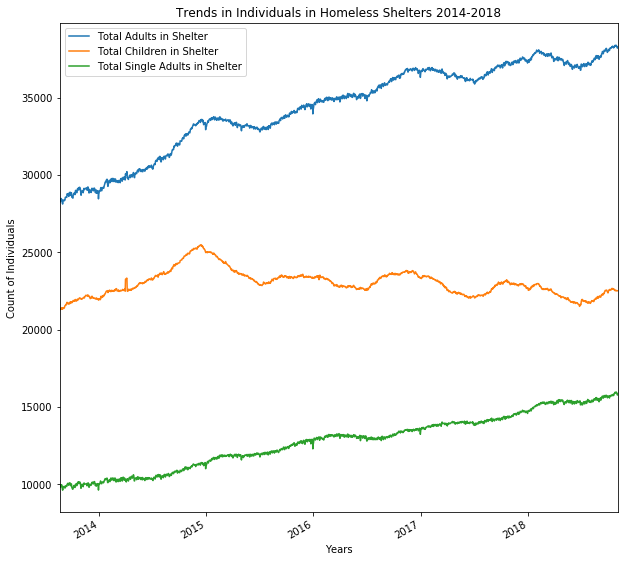

In [43]:
data['Total Adults in Shelter'].plot()
data['Total Children in Shelter'].plot()
data['Total Single Adults in Shelter'].plot()
plt.legend()
plt.title('Trends in Individuals in Homeless Shelters 2014-2018')
plt.xlabel('Years')
plt.ylabel('Count of Individuals')


In [69]:
data['Total Adult Families + other']=data['Individuals in Adult Families in Shelter']+data['Total Children in Shelter']
data['Total Adults in Shelter + kids']=data['Total Adult Families + other']+data['Total Single Adults in Shelter']

In [70]:
data

Total Adults in Shelter  Total Children in Shelter  \
Date of Census                                                       
2013-08-21                        28359                      21314   
2013-08-22                        28366                      21324   
2013-08-23                        28257                      21291   
2013-08-24                        28274                      21343   
2013-08-25                        28458                      21400   
2013-08-26                        28485                      21392   
2013-08-27                        28414                      21322   
2013-08-28                        28428                      21325   
2013-08-29                        28396                      21412   
2013-08-30                        28182                      21343   
2013-08-31                        28127                      21335   
2013-09-01                        28259                      21403   
2013-09-02                        28377                      21404   
2013-09-04                        28379                      21372   
2013-09-06                        28337                      21410   
2013-09-07                        28410                      21502   
2013-09-08                        28402                      21555   
2013-09-09                        28557                      21566   
2013-09-10                        28572                      21577   
2013-09-11                        28580                      21571   
2013-09-12                        28587                      21653   
2013-09-13                        28556                      21662   
2013-09-14                        28556                      21694   
2013-09-15                        28773                      21767   
2013-09-16                        28801                      21725   
2013-09-17                        28755                      21697   
2013-09-18                        28787                      21663   
2013-09-19                        28719                      21695   
2013-09-20                        28673                      21705   
2013-09-21                        28619                      21663   
...                                 ...                        ...   
2018-10-04                        38144                      22555   
2018-10-05                        38082                      22575   
2018-10-06                        38059                      22598   
2018-10-07                        38150                      22583   
2018-10-08                        38210                      22569   
2018-10-09                        38244                      22590   
2018-10-11                        38237                      22561   
2018-10-12                        38210                      22597   
2018-10-13                        38245                      22649   
2018-10-14                        38298                      22663   
2018-10-15                        38323                      22644   
2018-10-16                        38276                      22642   
2018-10-17                        38338                      22665   
2018-10-18                        38305                      22614   
2018-10-19                        38258                      22618   
2018-10-20                        38230                      22632   
2018-10-21                        38309                      22631   
2018-10-22                        38294                      22572   
2018-10-23                        38313                      22564   
2018-10-24                        38389                      22570   
2018-10-25                        38377                      22519   
2018-10-26                        38351                      22538   
2018-10-27                        38363                      22544   
2018-10-28                        38411                      22546   
2018-10-29                

Text(0,0.5,'Count of Individuals')

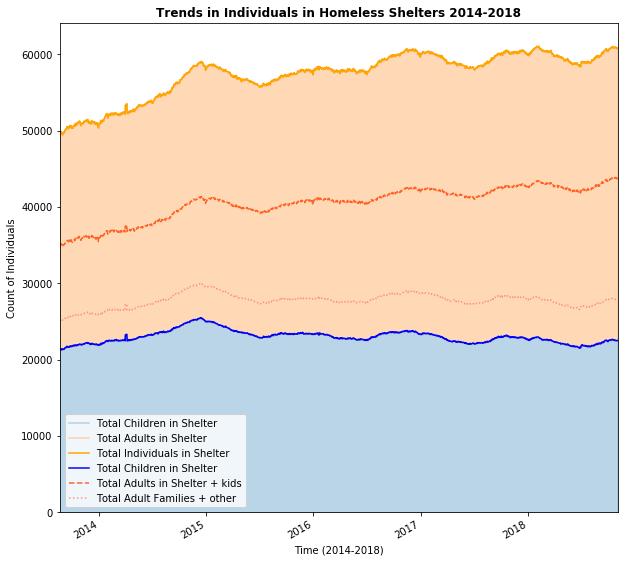

In [99]:
#data['Total Adults in Shelter + kids'].plot(kind='area', stacked=True, color='Red', alpha=.2)
data[['Total Children in Shelter','Total Adults in Shelter']].plot(kind='area', stacked=True, alpha=.3, legend=False)
data['Total Individuals in Shelter'].plot(color='Orange')
data['Total Children in Shelter'].plot(color='Blue')
data['Total Adults in Shelter + kids'].plot(kind='line', stacked=True, color='OrangeRed', alpha=.8, linestyle='--')
data['Total Adult Families + other'].plot(kind='line', stacked=True, color='Salmon', alpha=.8, linestyle=':')
plt.legend()
plt.title('Trends in Individuals in Homeless Shelters 2014-2018', fontweight='bold')
plt.xlabel('Time (2014-2018)')
plt.ylabel('Count of Individuals')

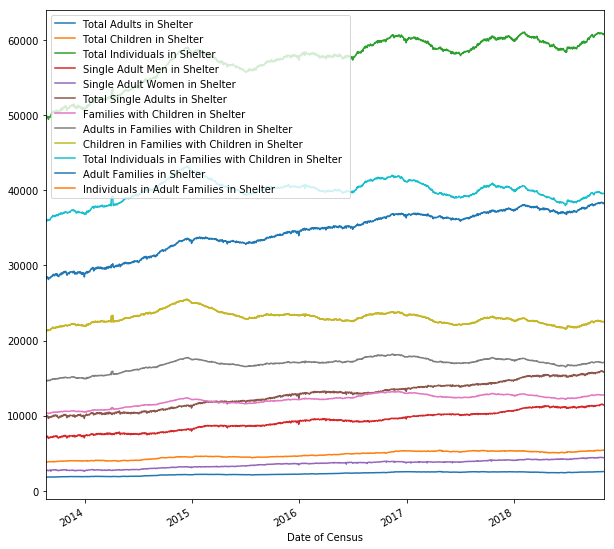

In [27]:
plt.figure(figsize(10,10))
data.plot()

In [79]:
data.plot?